In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 8: top-down hierarchical clustering

The goal of this problem is to write a function that implements divisive clustering (aka top-down hierarchical clustering).

Steps of Divisive Clustering:

- **Initialization:** Initially, all points in the dataset belong to one single cluster.
- **Step 1:** Select the cluster with the largest "sum of squared distances to its center".
- **Step 2:** Use kmeans to partition the selected cluster into two clusters.
- **Repeat** steps 1 and 2 until the desired number of clusters is obtained.

In [26]:
# kmeans function 
def kmeans(X,k,max_iterations=1000):
    from sklearn.metrics import pairwise_distances
    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initialization
    means = X[np.random.choice(m,k,replace=False)] 
    dist = pairwise_distances(X,means)
    clusters = np.argmin(dist, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update clusters
        dist = pairwise_distances(X,means)
        new_clusters = np.argmin(dist, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
    
    return clusters, means

In [166]:
# divisive_clustering function
def divisive_clustering(X,n_clusters=1):
    
    # initialization
    k = 1
    clusters = np.zeros(len(X))
    means = np.mean(X,axis=0,keepdims=True)
    
    while k<n_clusters:
        
        # compute sum of squared distances to center
        dist = np.array([np.sum((X[clusters==i]-means[i])**2) for i in range(k)])
        
        # select cluster with larger sum of squared distances to center
        c = np.argmax(dist) 
        
        # split selected cluster
        kmeans_clusters, kmeans_means = kmeans(X[clusters==c],k=2)
        kmeans_clusters += c 
        
        # update clusters
        clusters[clusters>c] += 1
        clusters[clusters==c] = kmeans_clusters
        
        # update means
        means = np.r_[(means[0:c],kmeans_means,means[c+1:k])]
        
        # update number of clusters
        k += 1
        
    return clusters, means

Test your function on the following toy dataset

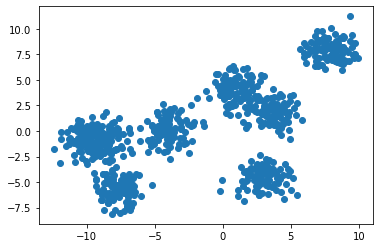

In [167]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=800,
                 centers = 8,
                 cluster_std=1,
                 random_state=3) 
plt.scatter(X[:,0],X[:,1])

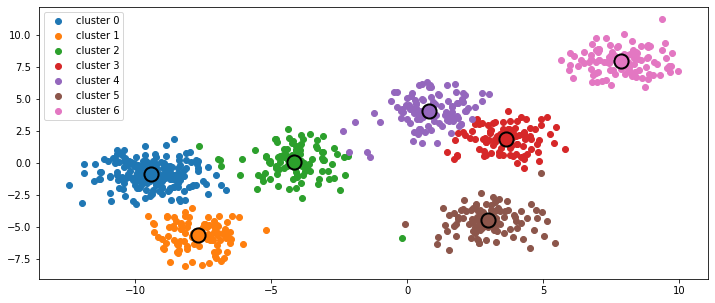

In [169]:
k = 7
clusters, means = divisive_clustering(X,n_clusters=k)

# plot clusters
plt.figure(figsize=(12,5))
colors = ['C'+str(i) for i in range(k)]
for i in range(k):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  # size
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')

plt.legend()

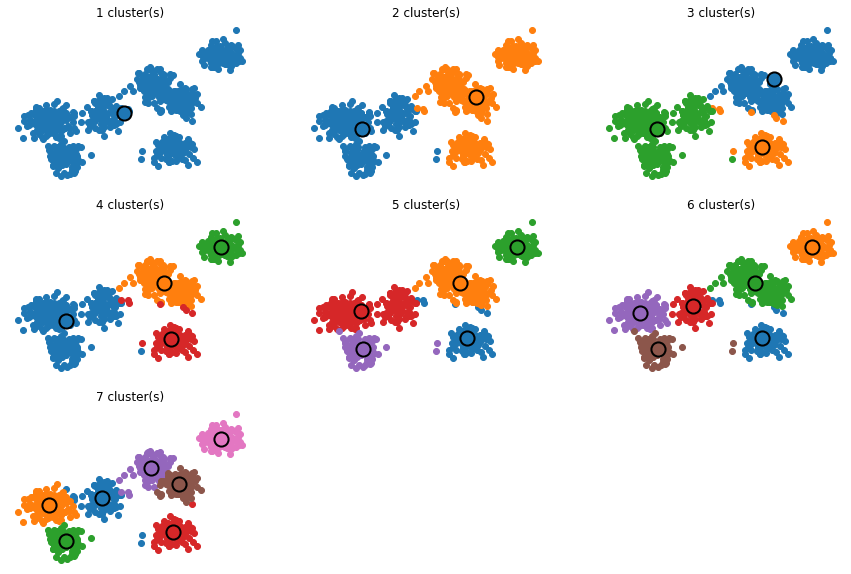

In [170]:
plt.figure(figsize=(15,10))
colors = ['C'+str(i) for i in range(8)]
for k in range(1,8):
    plt.subplot(3,3,k)
    clusters, means = divisive_clustering(X,n_clusters=k)
    for i in range(k):
        plt.scatter(X[clusters==i,0],X[clusters==i,1],label = 'cluster '+str(i), color = colors[i]) 
        plt.scatter(means[i,0],means[i,1],
                    marker='o',
                    s= 200,  # size
                    linewidths = 2,
                    color = colors[i], 
                    edgecolors='black')
        plt.title(str(k)+' cluster(s)')
    
    
    plt.axis(False)